In [3]:
import numpy as np
import os,sys

In [4]:
print(sys.version)
print(sys.executable)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
c:\Users\Willi\anaconda3\envs\SpecsimV2\python.exe


In [5]:
sys.path.append('../')
os.chdir('../')
# os.chdir('C:/Users/Willi/Documents/GitHub/specsim/')
print('Current working directory is', os.getcwd())

Current working directory is C:\Users\Willi\Documents\GitHub


In [1]:
# import some general packages
import sys,os
import numpy as np
# import matplotlib.pylab as plt
# from scipy import interpolate
# from matplotlib.colors import LogNorm
# from datetime import date

# Load some stuff from specsim
# Run in main folder specsim/
# os.chdir('../') # if running in examples/ folder, need to be in main folder
os.chdir('C:/Users/Willi/Documents/GitHub/specsim/')
print('Current working directory is', os.getcwd()) # should be /GitHub/specsim/
# from specsim import objects, load_inputs, functions, plot_tools, obs_tools
from specsim import objects, plot_tools
from specsim.load_inputs import fill_data

Current working directory is C:\Users\Willi\Documents\GitHub\specsim


In [7]:
# config_path = './configs/modhis_snr.cfg'
config_path = './configs/melby_test_config.cfg'
print("Does the config file exist?", os.path.exists(config_path)) # make sure the current working directory is in GitHub (specsim parent folder)

Does the config file exist? True


In [3]:
# os.chdir('C:/Users/Willi/Documents/GitHub/specsim/')
configfile = './configs/modhis_snr.cfg' # define our config file name and path
# configfile = './configs/melby_test_config.cfg'
so    = objects.load_object(configfile)  # Load the contents of the config file into the so "storage object"
cload = fill_data(so)        # Initiate the fill_data class which runs an observation and stores the results in so

------FILLING OBJECT--------
Teff set to 200.0
H band mag set to 18.0
Auto AO Mode
AO mag is 17.91 in R band for defaultK AO star (H=default)
AO mode chosen: LGS_ON
HO WFE is 150
tt dynamic is 2.4
Nframes set to 1
Texp per frame set to 900.0


To change one parameter in the storage object:

In [ ]:
so.stel.teff = 5800             # redefine the stellar temperature
cload = fill_data(so)           # redo filling the data

------FILLING OBJECT--------
Teff set to 5800
H band mag set to 16.0
AO mag is 16.94 in R band for defaultK AO star (H=default)
AO mode chosen: NGS
HO WFE is 975
tt dynamic is 9.71
Nframes set to 1
Texp per frame set to 900.0


To plot parts of the so:

Choose pixel or res_element for snrtype


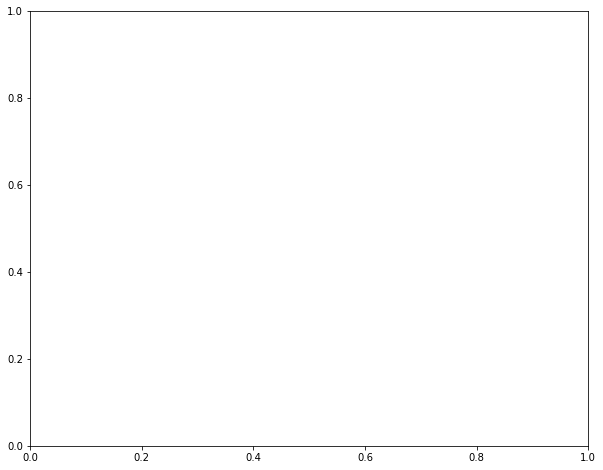

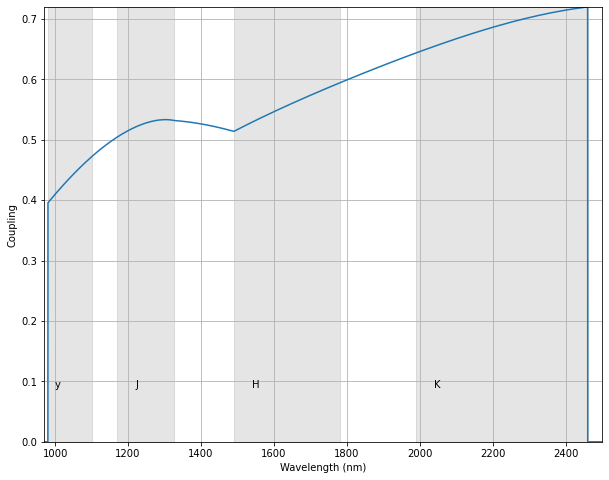

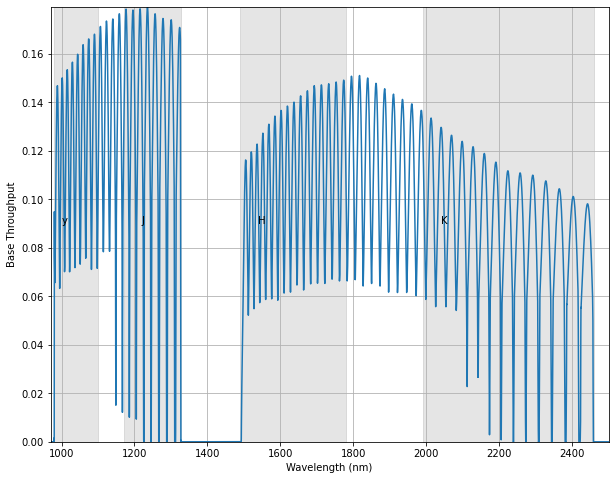

In [27]:
savepath = './'
plot_tools.plot_snr(so,snrtype=0,savepath=savepath)
plot_tools.plot_coupling(so,savepath=savepath) # these ones are weird
plot_tools.plot_base_throughput(so,savepath=savepath)
# plot_tools.plot_tracking_bands(so,savepath=savepath)
# plot_tools.plot_background_spectra(so,savepath=savepath)

In [ ]:
sonora_path = 'C:/Users/Willi/Documents/Research/Stellar_Data/sonora_folder/profile/t200g17nc_m0.0.cmp'
print("Does the file exist?", os.path.exists(config_path))

Does the file exist? True


In [ ]:
sonora_folder='C:/Users/Willi/Documents/GitHub/specsim/data/stel/sonora/'
stel_file = sonora_folder + 'sp_t200g10nc_m0.0'
print("Does the file exist?", os.path.exists(stel_file))

Does the file exist? True


In [ ]:
from references.contrast_profiles import *

In [ ]:
csv_to_plot = 'C:/Users/Willi/Documents/Research/Specsim/contrast_csv_files/mcao_pyttf_50p_za45_mag16_evlpsfcl_1_x0_y0_J.csv'
csv_directory_to_plot = 'D:/mcao_pyttf/50p_za45/mag16/'

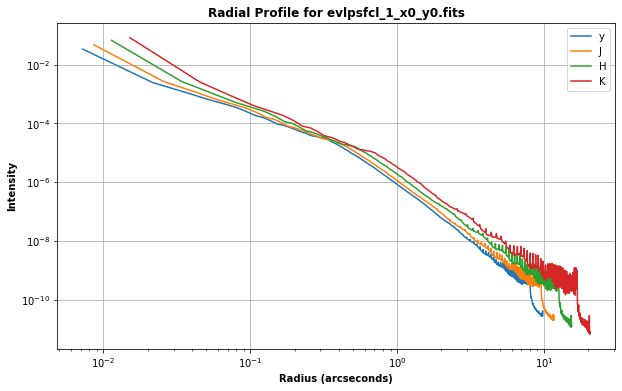

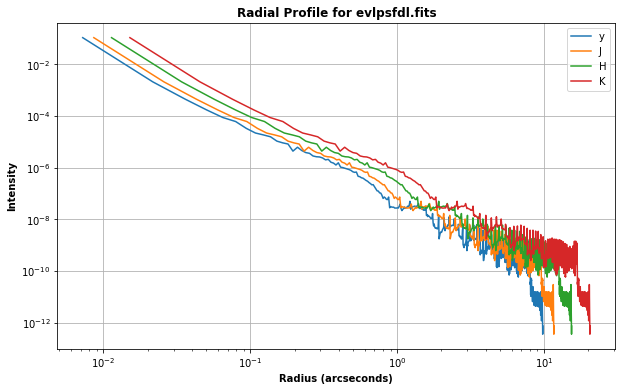

In [ ]:
plot_radial_profiles(process_directory(csv_directory_to_plot))

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
def plot_from_csv(csv_file):
    """Plot the csv data to show radial profile."""
    # Read the CSV file, skipping the header row
    df = pd.read_csv(csv_file)

    # Assuming the CSV has two columns, use their names to access the data
    x = df.iloc[:, 0]  # First column
    y = df.iloc[:, 1]  # Second column
    band = csv_file.split('_')[-1][:-4]
    csv_name = os.path.basename(csv_file)

    plt.figure(figsize=(10, 6))
    plt.loglog(x, y, label = band)
    plt.xlabel('Radius (arcseconds)', fontweight='bold', fontsize=14)
    plt.ylabel('Intensity', fontweight='bold', fontsize=14)
    # plt.title(f'Radial Profile for {csv_name}', fontweight='bold', fontsize=15)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

In [5]:
csvy = "C:/Users/Willi/Documents/Research/Specsim/contrast_csv_files/mcao_pyttf_50p_za45_mag13_evlpsfcl_1_x0_y0_y.csv"
csvj = "C:/Users/Willi/Documents/Research/Specsim/contrast_csv_files/mcao_pyttf_50p_za45_mag13_evlpsfcl_1_x0_y0_J.csv"
csvh = "C:/Users/Willi/Documents/Research/Specsim/contrast_csv_files/mcao_pyttf_50p_za45_mag13_evlpsfcl_1_x0_y0_H.csv"
csvk = "C:/Users/Willi/Documents/Research/Specsim/contrast_csv_files/mcao_pyttf_50p_za45_mag13_evlpsfcl_1_x0_y0_K.csv"

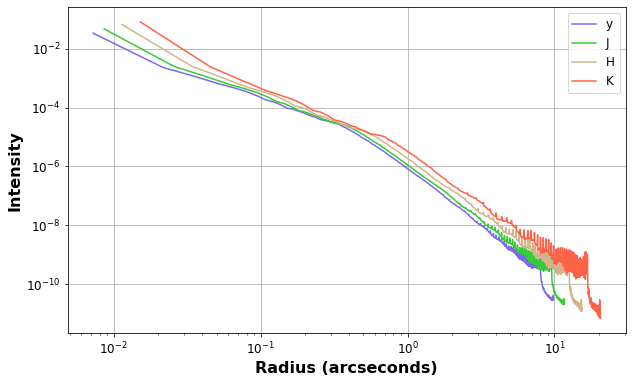

In [24]:
df1 = pd.read_csv(csvy)
df2 = pd.read_csv(csvj)
df3 = pd.read_csv(csvh)
df4 = pd.read_csv(csvk)

plt.figure(figsize=(10, 6))
plt.loglog(df1.iloc[:,0], df1.iloc[:,1], label = 'y', color='mediumslateblue')
plt.loglog(df2.iloc[:,0], df2.iloc[:,1], label = 'J', color='limegreen')
plt.loglog(df3.iloc[:,0], df3.iloc[:,1], label = 'H', color='tan')
plt.loglog(df4.iloc[:,0], df4.iloc[:,1], label = 'K', color='tomato')
plt.xlabel('Radius (arcseconds)', fontweight='bold', fontsize=16)
plt.ylabel('Intensity', fontweight='bold', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)

output_folder = 'C:/Users/Willi/Documents/Research/Specsim/plots/'
filename = 'Radial_Profiles_mcao_50p_za45_mag13.png'
os.makedirs(output_folder, exist_ok=True)
plt.savefig(f'{output_folder}{filename}', facecolor='white', edgecolor='white')

plt.show()